The following script was made written by Jens Bager Christensen (jbc53@cam.ac.uk) to perform trajectory analysis using scVelo in relation to the publication Christensen et al., 2025. 
For further informatino please refer to the scVelo vignette found at : https://scvelo.readthedocs.io/en/stable/ 
Or the related publication : doi:10.1038/s41587-020-0591-3

In [ ]:
#import package required for RNA velocity
import scvelo as scv
import scanpy as sc
import matplotlib as plt
scv.logging.print_version()

Running scvelo 0.3.1 (python 3.9.18) on 2024-11-13 16:32.


ERROR: XMLRPC request failed [code: -32500]
RuntimeError: PyPI no longer supports 'pip search' (or XML-RPC search). Please use https://pypi.org/search (via a browser) instead. See https://warehouse.pypa.io/api-reference/xml-rpc.html#deprecated-methods for more information.


In [ ]:
#Setting the basic parameters according to standard pipeline
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.settings.set_figure_params('scvelo')  # for beautified visualization

In [ ]:
#Load the data created in 'RNA_sequencing_captures_NEP_lineage_decision_in_vivo.RMD'
bifurcation = sc.read_h5ad("/mnt/beegfs6/home3/bayin/jbc53/scRNA-seq_2023/Christensen_et_al_2024/data/h5ad/nonIR_bifurcation_NEPs.h5ad")

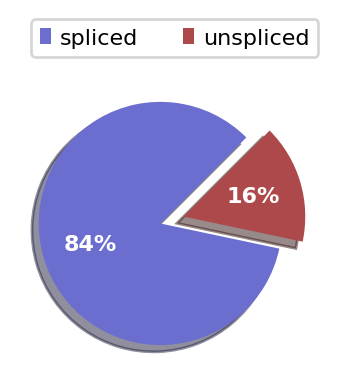

In [ ]:
#seeing the proportion of spliced vs. unspliced RNA
scv.pl.proportions(bifurcation)

In [ ]:
#from the vignette:
#Preprocessing requisites consist of gene selection by detection (with a minimum number of counts) and high
#variability (dispersion), normalizing every cell by its total size and logarithmizing X. Filtering and
#normalization is applied in the same vein to spliced/unspliced counts and X. Logarithmizing is only applied to X.
#If X is already preprocessed from former analysis, it will not be touched.
scv.pp.filter_and_normalize(bifurcation, min_shared_counts=20, n_top_genes=5000)
scv.pp.moments(bifurcation, n_pcs=30, n_neighbors=30)

Filtered out 51382 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 5000 highly variable genes.
Logarithmized X.


/mnt/home3/bayin/jbc53/anaconda3/envs/scVelo_env/lib/python3.9/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


computing neighbors
    finished (0:00:08) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [ ]:
#from the vignette:
#It is solved in a likelihood-based expectation-maximization framework, by iteratively estimating the parameters of
#reaction rates and latent cell-specific variables, i.e. transcriptional state and cell-internal latent time. It
#thereby aims to learn the unspliced/spliced phase trajectory for each gene.
scv.tl.recover_dynamics(bifurcation, n_jobs=10)
scv.tl.velocity(bifurcation, mode='deterministic', use_latent_time=True)
scv.tl.velocity_graph(bifurcation)

recovering dynamics (using 10/128 cores)
or disable the progress bar using `show_progress_bar=False`.
    finished (0:07:22) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/128 cores)
    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity graph (using 1/128 cores)
    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 1 region of root cells and 1 region of end points .
    finished (0:00:01) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)


/mnt/home3/bayin/jbc53/anaconda3/envs/scVelo_env/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/mnt/home3/bayin/jbc53/anaconda3/envs/scVelo_env/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/mnt/home3/bayin/jbc53/anaconda3/envs/scVelo_env/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/mnt/home3/bayin/jb

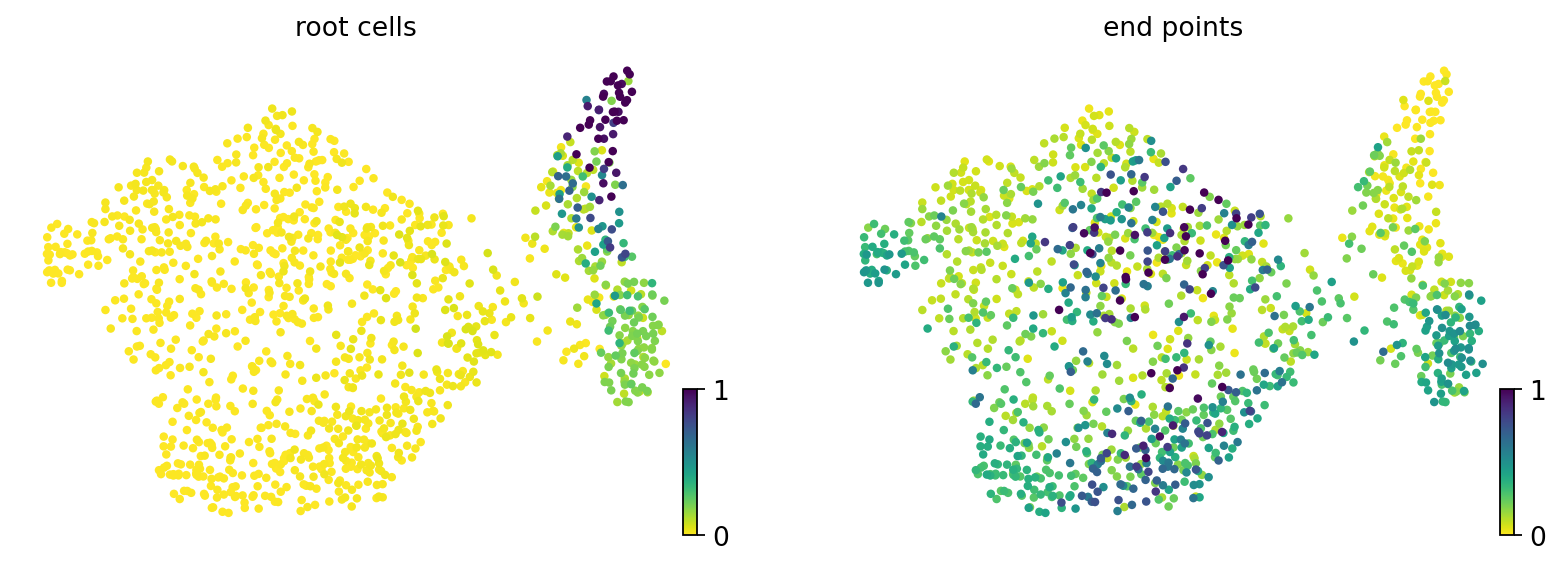

/mnt/home3/bayin/jbc53/anaconda3/envs/scVelo_env/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/mnt/home3/bayin/jbc53/anaconda3/envs/scVelo_env/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/mnt/home3/bayin/jbc53/anaconda3/envs/scVelo_env/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/mnt/home3/bayin/jb

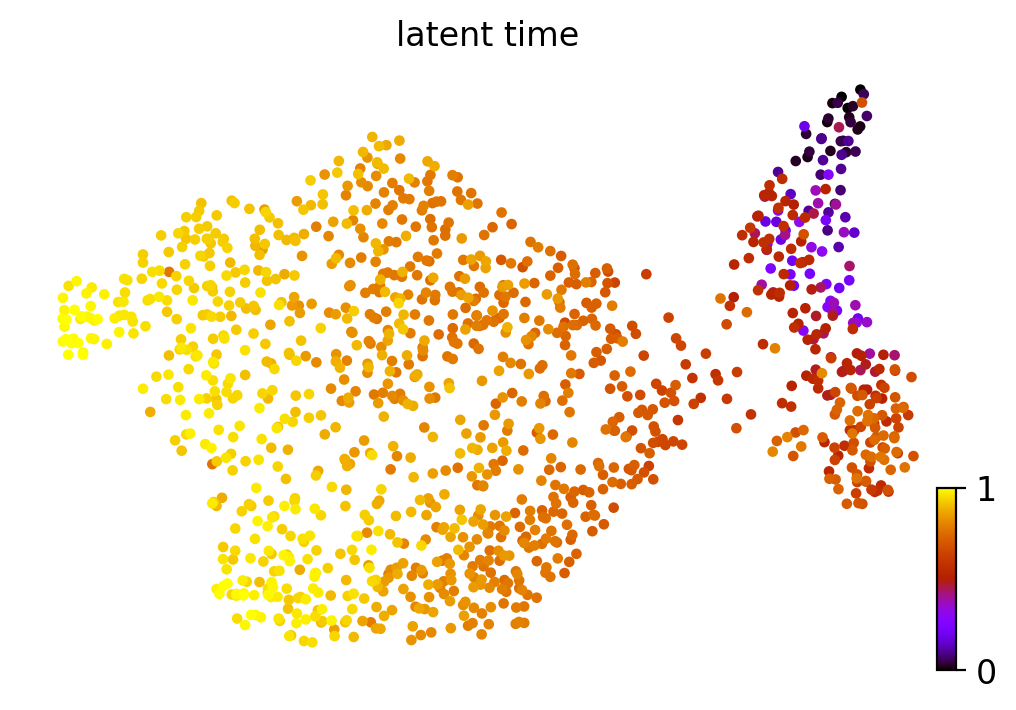

In [ ]:
#calculating the latent time within the data
scv.tl.velocity_graph(bifurcation, mode_neighbors='connectivities') #both mode_neighbors='connectivities' and mode_neighbors='distances' were tried
scv.tl.terminal_states(bifurcation) #root cells and end points ( stationary states ) were computed
scv.tl.latent_time(bifurcation) #computes a gene-shared latent time for the cells in the dataset

#plotting UMAPs with stationary states and latent time overlay
scv.pl.scatter(bifurcation, color=[ 'root_cells', 'end_points'])
scv.pl.scatter(bifurcation, color='latent_time',color_map='gnuplot')

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


/mnt/home3/bayin/jbc53/anaconda3/envs/scVelo_env/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/mnt/home3/bayin/jbc53/anaconda3/envs/scVelo_env/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/mnt/home3/bayin/jbc53/anaconda3/envs/scVelo_env/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/mnt/home3/bayin/jb

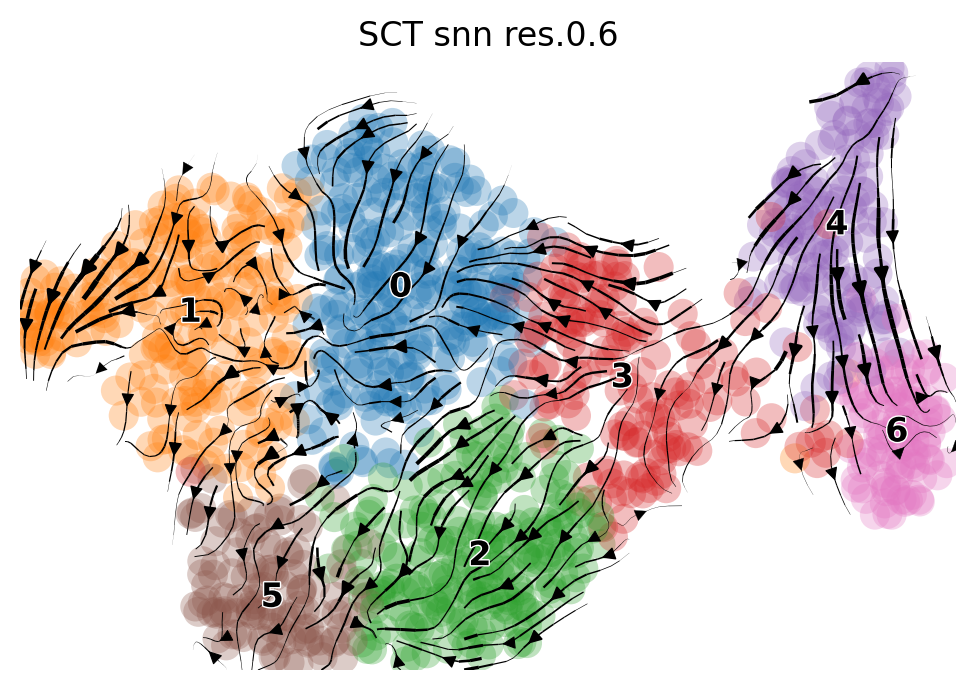

In [ ]:
#plot the computed streams of trajectories onto the UMAP
scv.pl.velocity_embedding_stream(bifurcation, basis='umap', color = "SCT_snn_res.0.6")

/mnt/home3/bayin/jbc53/anaconda3/envs/scVelo_env/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/mnt/home3/bayin/jbc53/anaconda3/envs/scVelo_env/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/mnt/home3/bayin/jbc53/anaconda3/envs/scVelo_env/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/mnt/home3/bayin/jb

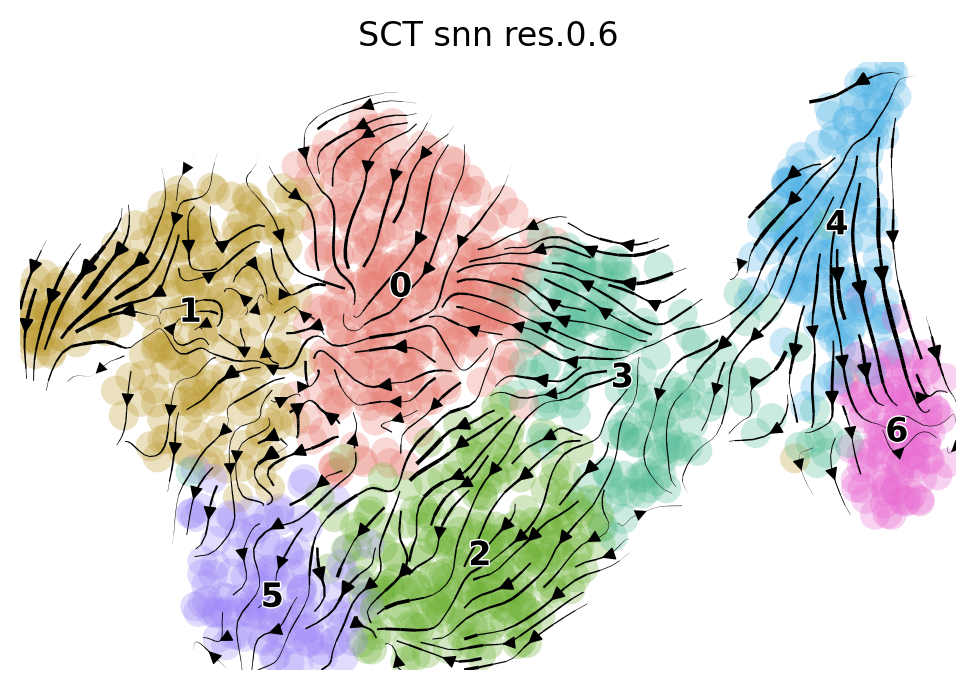

/mnt/home3/bayin/jbc53/anaconda3/envs/scVelo_env/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/mnt/home3/bayin/jbc53/anaconda3/envs/scVelo_env/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/mnt/home3/bayin/jbc53/anaconda3/envs/scVelo_env/lib/python3.9/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/mnt/home3/bayin/jb

saving figure to file /mnt/beegfs6/home3/bayin/jbc53/scRNA-seq_2023/Christensen_et_al_2024/results/nonIR_WM_scVelo_no_labels.png


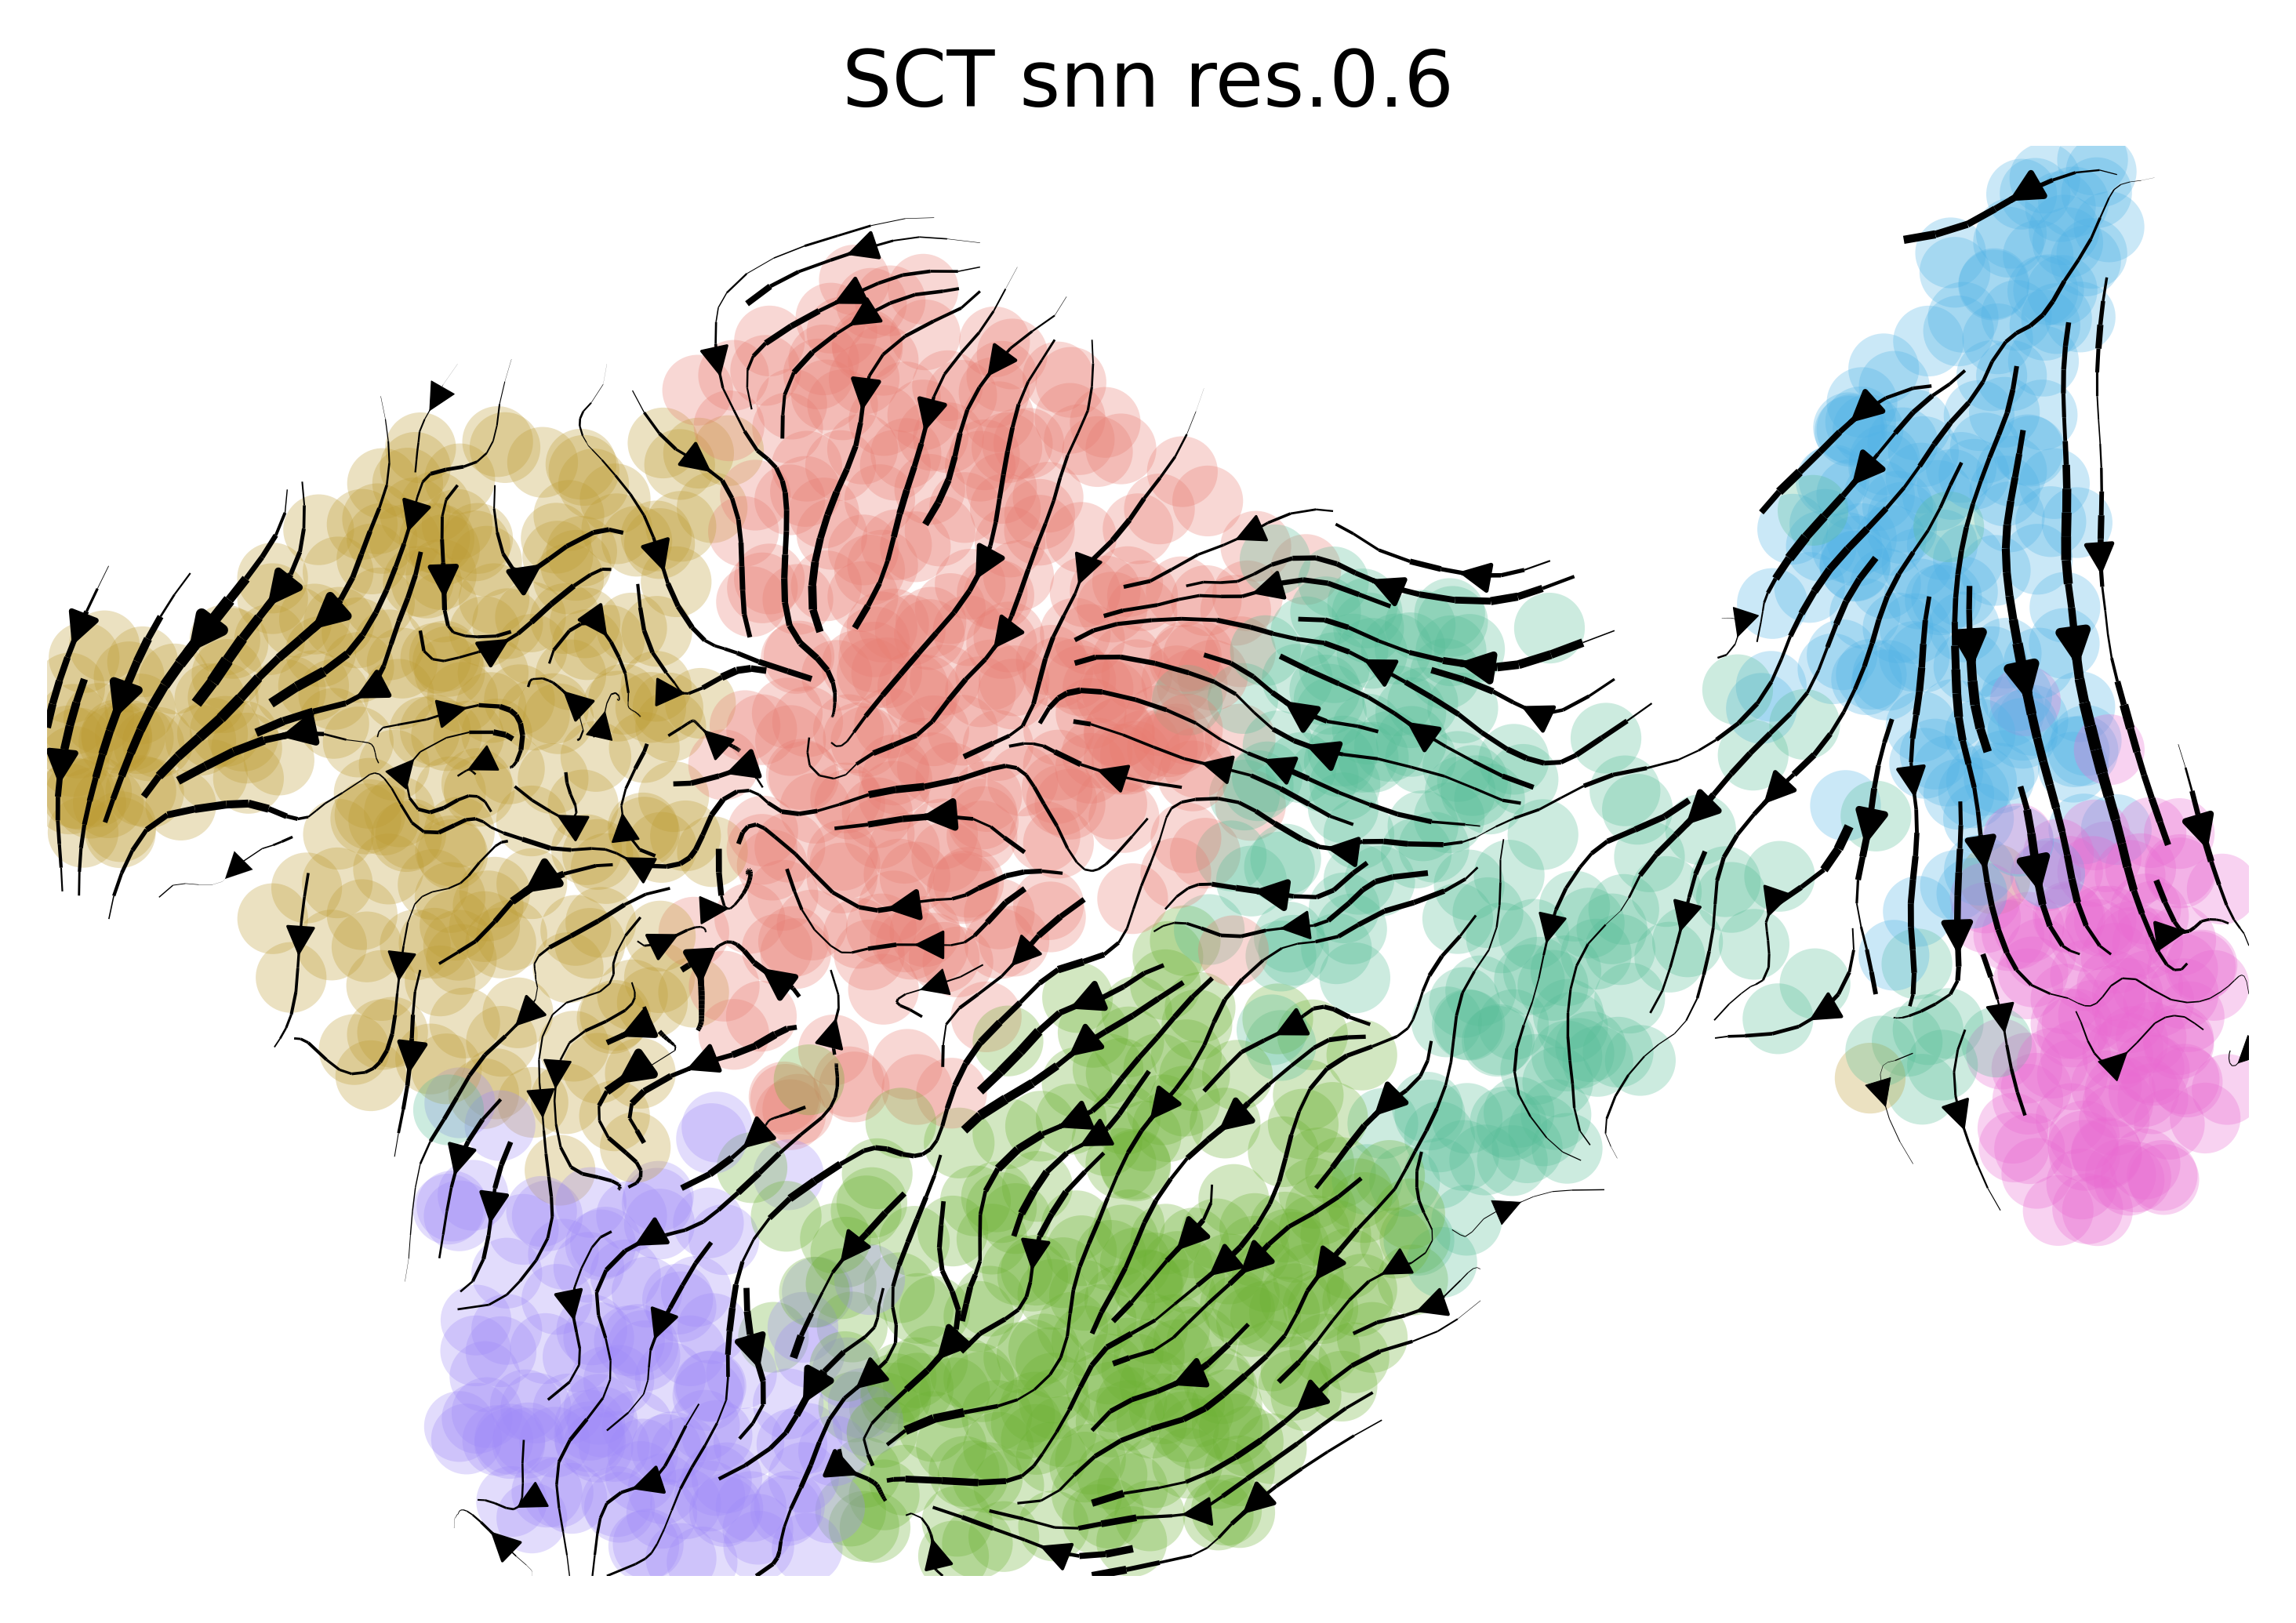

In [ ]:
#define the colours used by Seurat for the individual clusters (color HEX found in Illustrator)
plot_col = ["#e87d72", "#bd9c33", "#6db234", "#56bd97", "#51b3e6", "#a08bf8", "#e96bd2"]

#plot the figure with the updated colours
scv.pl.velocity_embedding_stream(bifurcation, basis='umap', color = "SCT_snn_res.0.6", palette = plot_col)